# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Three observable trends in the data are as follows.  Firstly, as you approach the latitude
# of zero, max temperature increases.  This makes sense logically and we know it anecdotally
# to be true.  Secondly, even when splitting the data into northern and southern hemispheres,
# the temperature and latitude relationship remains solid, with strong r-squared numbers for
# the regressions.  This shows that the relationship is significant, more so than if we ran
# a regression on the full dataset, as we would be trying to fit a line to curved data.  Lastly,
# there is no clear relationship between latitude and humidity, cloudiness, or wind speed.  This
# remained so even after we split the hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
#from api_keys import weather_api_key
weather_api_key = "cdfa51409f2c2208085a112989cda3de"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

cdfa51409f2c2208085a112989cda3de


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

cityinfo = [] 
citynum = 0
for city in cities:
    
# Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        weather_dict = {'City' : city,
                    'Lat' : weather_json["coord"]["lat"],
                    'Lon' : weather_json["coord"]["lon"],
                    'Max Temp' : weather_json["main"]["temp_max"],
                    'Humidity' : weather_json["main"]["humidity"], 
                    'Cloudiness' : weather_json["clouds"]["all"],
                    'Wind Speed' : weather_json["wind"]["speed"],
                    'Country' : weather_json["sys"]["country"],
                    'Date' : weather_json["dt"]
                   }
        cityinfo.append(weather_dict)
        citynum = citynum + 1
        print(citynum, city)
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")  

1 vaini
2 krasnyy chikoy
3 bengkulu
4 puerto ayora
5 petropavl
6 bud
7 bambous virieux
8 sesvete
9 juneau
10 ponta do sol
11 vila velha
12 east london
13 kotaparh
14 narsaq
15 bandarbeyla
16 airai
17 aklavik
18 zhigansk
19 cadillac
20 rikitea
21 ushuaia
22 coquimbo
23 alto araguaia
24 cartagena del chaira
25 leningradskiy
26 bredasdorp
27 inuvik
28 poum
Missing field/result... skipping.
Missing field/result... skipping.
29 apiai
30 qaanaaq
Missing field/result... skipping.
Missing field/result... skipping.
31 barrow
32 kodiak
33 nijar
34 carnarvon
35 alofi
36 hilo
37 punta arenas
38 severo-kurilsk
39 samarina
40 tura
41 lazaro cardenas
42 hobart
43 saint-philippe
44 lambarene
45 batemans bay
Missing field/result... skipping.
46 marabba
47 emerald
48 findhorn
49 tarko-sale
50 hualmay
51 fortuna
52 thompson
53 lagunas
Missing field/result... skipping.
54 kihei
55 albany
56 nuuk
Missing field/result... skipping.
Missing field/result... skipping.
57 port alfred
58 kununurra
59 mataura
60 a

508 pravia
509 skeldon
510 valley city
511 dogondoutchi
512 lasa
513 pemba
514 port-cartier
Missing field/result... skipping.
515 tilichiki
516 luanda
Missing field/result... skipping.
517 prince albert
518 altoona
519 yaan
520 vero beach
521 kabanjahe
522 shitanjing
523 san patricio
524 paraiso
Missing field/result... skipping.
525 angoram
526 kokoda
527 leshan
528 esso
529 nanortalik
530 bilma
531 vryburg
532 kruisfontein
533 san quintin
534 pitimbu
535 dalianwan
536 nicolas bravo
537 arlit
538 vila
539 palmas
540 betanzos
541 sindor
542 calamar
543 nsoko
544 cururupu
545 houma
Missing field/result... skipping.
546 zhanaozen
547 kiama
548 yumen
549 hereford
Missing field/result... skipping.
550 kalevala
551 santa cruz
Missing field/result... skipping.
552 dunedin
553 marawi
554 eyl
555 taltal
556 sao jose da coroa grande
557 turbat
558 wanning
559 nerkunram
560 rocha
561 lloydminster
562 akureyri
563 macas
564 seoul
565 sahuaripa


In [4]:
df = pd.DataFrame(cityinfo)

In [5]:
df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,293.15,94,75,2.10,TO,1593025381
1,krasnyy chikoy,50.36,108.75,284.11,87,85,0.09,RU,1593025771
2,bengkulu,-3.80,102.27,298.77,65,100,0.52,ID,1593025509
3,puerto ayora,-0.74,-90.35,300.15,61,20,1.50,EC,1593025511
4,petropavl,54.88,69.16,286.49,92,88,4.56,KZ,1593025772
...,...,...,...,...,...,...,...,...,...
560,lloydminster,53.28,-110.00,293.15,64,75,3.10,CA,1593025648
561,akureyri,65.68,-18.09,288.15,58,40,9.30,IS,1593025825
562,macas,-2.32,-78.12,299.15,54,40,5.70,EC,1593025808
563,seoul,37.57,126.98,294.15,100,90,2.10,KR,1593025335


In [6]:
df.to_csv('cityinfo.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.drop(df[df['Humidity'] > 100].index, inplace = True) 

In [8]:
df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,293.15,94,75,2.10,TO,1593025381
1,krasnyy chikoy,50.36,108.75,284.11,87,85,0.09,RU,1593025771
2,bengkulu,-3.80,102.27,298.77,65,100,0.52,ID,1593025509
3,puerto ayora,-0.74,-90.35,300.15,61,20,1.50,EC,1593025511
4,petropavl,54.88,69.16,286.49,92,88,4.56,KZ,1593025772
...,...,...,...,...,...,...,...,...,...
560,lloydminster,53.28,-110.00,293.15,64,75,3.10,CA,1593025648
561,akureyri,65.68,-18.09,288.15,58,40,9.30,IS,1593025825
562,macas,-2.32,-78.12,299.15,54,40,5.70,EC,1593025808
563,seoul,37.57,126.98,294.15,100,90,2.10,KR,1593025335


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv('cityinfo.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

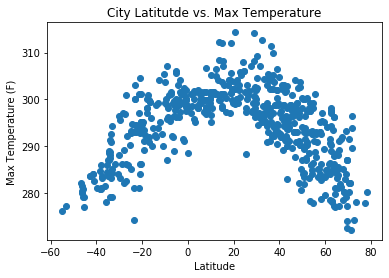

<Figure size 432x288 with 0 Axes>

In [27]:
# Print out the r-squared value along with the plot.
x_values = df['Lat']
y_values = df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitutde vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('latvtemp.png')

In [ ]:
# This plot is showing the relationship between latitude and max temperature.  As you approach
# 0 latitude, or the equator, temperature increases.  This accounts for the shape of the scatter.

## Latitude vs. Humidity Plot

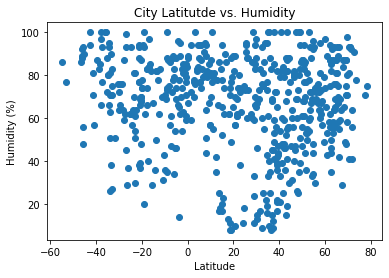

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = df['Lat']
y_values = df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitutde vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('latvhum.png')

In [ ]:
# This plot shows the relationship between latitude and humidity.  There is little relationship
# and we can infer that humidity is independant of latitude.

## Latitude vs. Cloudiness Plot

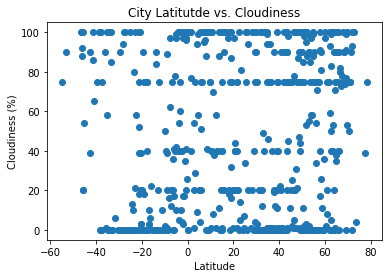

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = df['Lat']
y_values = df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitutde vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('latvcloud.png')

In [ ]:
# This plot shows the relationship between latitude and cloudiness.  Again, there seems to be
# little relationship, and we can infer that the two are independent.

## Latitude vs. Wind Speed Plot

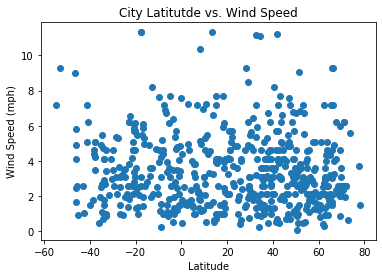

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = df['Lat']
y_values = df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitutde vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('latvwind.png')

In [ ]:
# This shows the relationship between latitude and wind speed.  There is little 
# relationship, and the two are likely independant.  Windpseed above 8 mph is rare.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

In [14]:
df_north = df.copy()
df_north

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,293.15,94,75,2.10,TO,1593025381
1,krasnyy chikoy,50.36,108.75,284.11,87,85,0.09,RU,1593025771
2,bengkulu,-3.80,102.27,298.77,65,100,0.52,ID,1593025509
3,puerto ayora,-0.74,-90.35,300.15,61,20,1.50,EC,1593025511
4,petropavl,54.88,69.16,286.49,92,88,4.56,KZ,1593025772
...,...,...,...,...,...,...,...,...,...
560,lloydminster,53.28,-110.00,293.15,64,75,3.10,CA,1593025648
561,akureyri,65.68,-18.09,288.15,58,40,9.30,IS,1593025825
562,macas,-2.32,-78.12,299.15,54,40,5.70,EC,1593025808
563,seoul,37.57,126.98,294.15,100,90,2.10,KR,1593025335


In [15]:
df_north.drop(df_north[df_north['Lat'] < 0].index, inplace = True) 
df_north

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,krasnyy chikoy,50.36,108.75,284.11,87,85,0.09,RU,1593025771
4,petropavl,54.88,69.16,286.49,92,88,4.56,KZ,1593025772
5,bud,39.45,-86.18,298.71,47,75,3.10,US,1593025516
7,sesvete,45.83,16.12,296.48,56,1,2.10,HR,1593025772
8,juneau,58.30,-134.42,286.15,62,90,3.60,US,1593025667
...,...,...,...,...,...,...,...,...,...
558,nerkunram,12.69,79.85,301.15,78,40,1.50,IN,1593025824
560,lloydminster,53.28,-110.00,293.15,64,75,3.10,CA,1593025648
561,akureyri,65.68,-18.09,288.15,58,40,9.30,IS,1593025825
563,seoul,37.57,126.98,294.15,100,90,2.10,KR,1593025335


In [16]:
df_south = df.copy()
df_south

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,293.15,94,75,2.10,TO,1593025381
1,krasnyy chikoy,50.36,108.75,284.11,87,85,0.09,RU,1593025771
2,bengkulu,-3.80,102.27,298.77,65,100,0.52,ID,1593025509
3,puerto ayora,-0.74,-90.35,300.15,61,20,1.50,EC,1593025511
4,petropavl,54.88,69.16,286.49,92,88,4.56,KZ,1593025772
...,...,...,...,...,...,...,...,...,...
560,lloydminster,53.28,-110.00,293.15,64,75,3.10,CA,1593025648
561,akureyri,65.68,-18.09,288.15,58,40,9.30,IS,1593025825
562,macas,-2.32,-78.12,299.15,54,40,5.70,EC,1593025808
563,seoul,37.57,126.98,294.15,100,90,2.10,KR,1593025335


In [17]:
df_south.drop(df_south[df_south['Lat'] > 0].index, inplace = True) 
df_south

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,293.15,94,75,2.10,TO,1593025381
2,bengkulu,-3.80,102.27,298.77,65,100,0.52,ID,1593025509
3,puerto ayora,-0.74,-90.35,300.15,61,20,1.50,EC,1593025511
6,bambous virieux,-20.34,57.76,295.15,68,20,5.70,MU,1593025505
10,vila velha,-20.33,-40.29,301.15,48,3,4.60,BR,1593025531
...,...,...,...,...,...,...,...,...,...
551,dunedin,-45.87,170.50,280.93,93,100,4.88,NZ,1593025423
554,taltal,-25.40,-70.48,290.29,62,100,0.93,CL,1593025540
555,sao jose da coroa grande,-8.90,-35.15,298.87,74,1,4.20,BR,1593025824
559,rocha,-34.48,-54.33,288.52,95,100,4.73,UY,1593025507


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4832648770671278


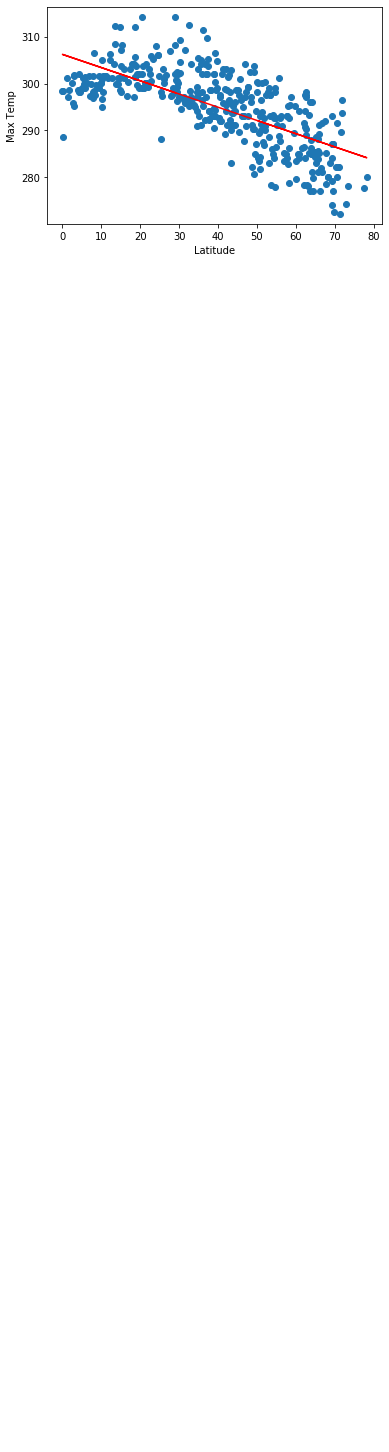

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = df_north['Lat']
y_values = df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvtempnorth.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6124947096896994


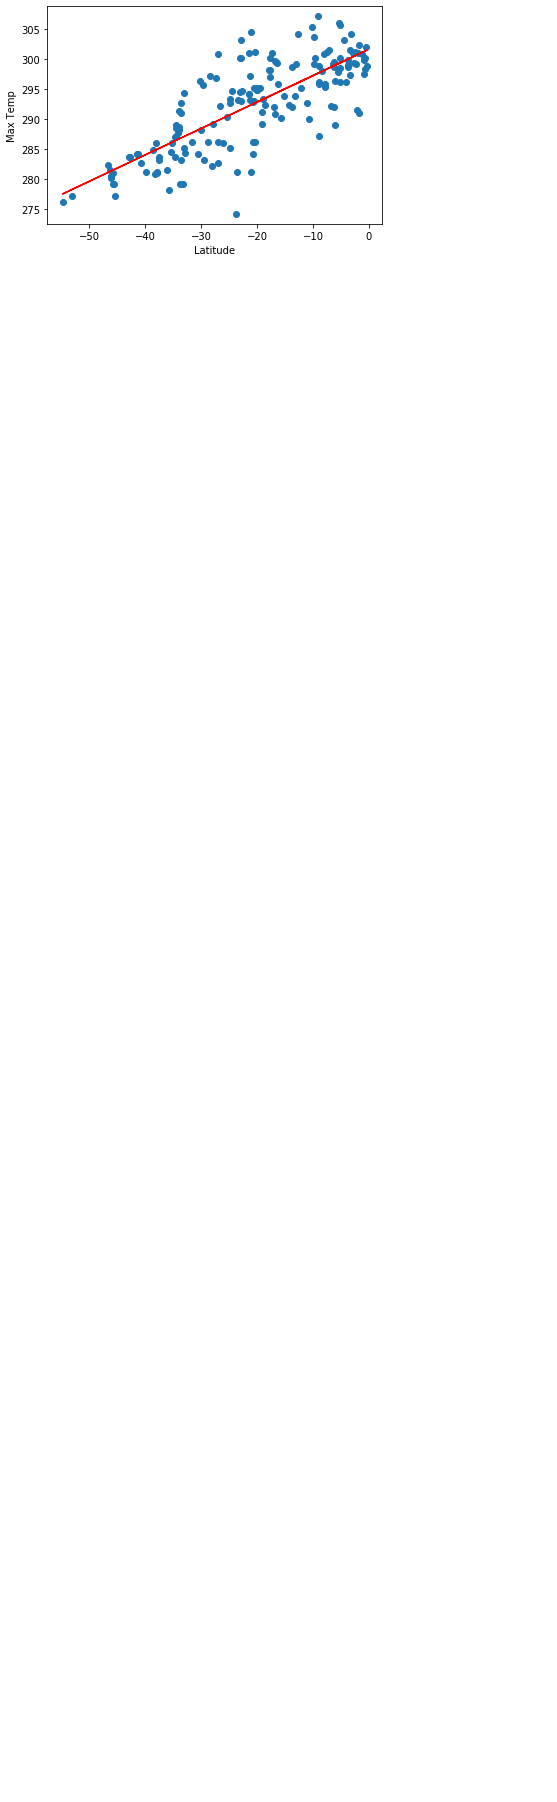

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = df_south['Lat']
y_values = df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvtempsouth.png')

In [ ]:
# These two plots show the relationship between latitude and temperature for the northern
# and southern hemispheres.  Again, as we saw in the first plot, as you approach 0 latitude,
# or the equator, temperature rises.  This corresponds to a downward slope for the first
# image, and an upward one for the second.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003931857094478352


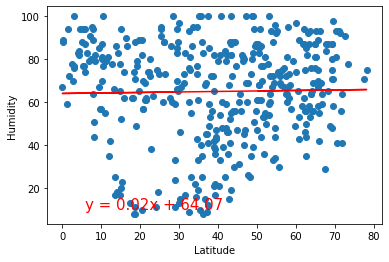

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = df_north['Lat']
y_values = df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvhumnorth.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019137243287642974


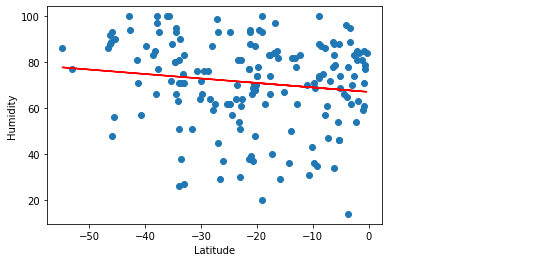

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = df_south['Lat']
y_values = df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvhumsouth.png')

In [ ]:
# These two images show the relationship between latitude and humidity for the northern and
# southern hemispheres, respectively.  Again, the r squared is very low for both, showing
# that there is little relationship between latitude and humidity, even when we split the 
# hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004327694646928209


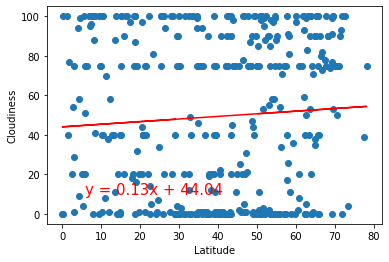

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = df_north['Lat']
y_values = df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvcouldnorth.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004728542601719353


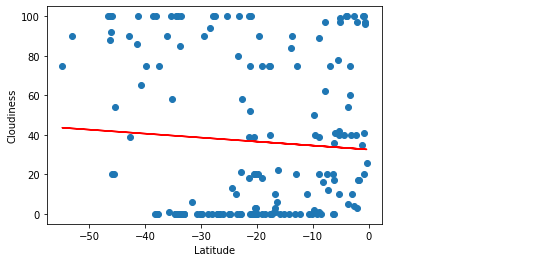

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = df_south['Lat']
y_values = df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvcloudsouth.png')

In [ ]:
# These two plots show the relationship between latitude and cloudiness.  Both have low
# r-squared values, and we can infer that there is little relationship, even when we split
# the hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017996463910372525


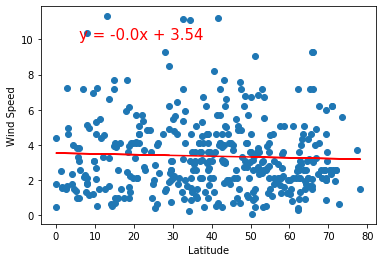

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = df_north['Lat']
y_values = df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvtwindnorth.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002623609852189354


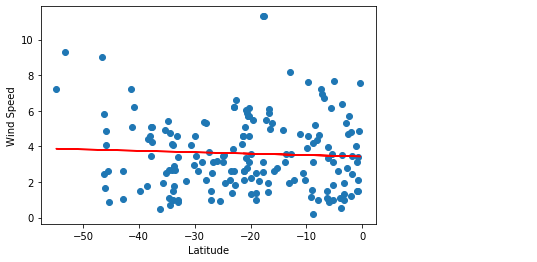

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = df_south['Lat']
y_values = df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('latvwindsouth.png')

In [ ]:
# Lastly, we examine the relationship between latitude and wind speed by splitting the 
# hemispheres.  Again, the r squared is very low and there is no clear relationship.  This 
# means that they are likely independant.